In [6]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import sqlite3

from db import get_value, call_db

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# import seaborn as sns 



In [7]:
conn = sqlite3.connect('MatchDB.db')
df = pd.read_sql_query("SELECT * FROM Games", conn)

In [8]:
df.loc[(df['HGoals'] > df['AGoals']), 'HomeWin'] = 1
df.loc[(df['HGoals'] < df['AGoals']), 'HomeWin'] = 0
df.loc[(df['HGoals'] == df['AGoals']), 'HomeWin'] = 0

# df.loc[(df['HGoals'] + df['AGoals']) > 2.5, 'OU'] = 1
# df.loc[(df['HGoals'] + df['AGoals']) < 2.5, 'OU'] = 0
df.head()

,id,match_id,date,League,Country,HomeTeam,AwayTeam,HGoals,AGoals,HomexG,...,AwayDuelsW,HomeTackW,AwayTackW,HomeTackWpercent,AwayTackWpercent,HomeInt,AwayInt,HomeClear,AwayClear,HomeWin
0,1,3900932,2022-08-05,Premier League,ENG,Crystal Palace,Arsenal,0,2,1.21,...,72.0,9.0,16.0,50.0,55.0,8.0,9.0,19.0,24.0,0.0
1,2,3900933,2022-08-06,Premier League,ENG,Fulham,Liverpool,2,2,1.25,...,35.0,13.0,9.0,52.0,82.0,10.0,10.0,30.0,14.0,0.0
2,3,3900934,2022-08-06,Premier League,ENG,AFC Bournemouth,Aston Villa,2,0,0.59,...,58.0,12.0,8.0,60.0,80.0,13.0,8.0,36.0,8.0,1.0
3,4,3900935,2022-08-06,Premier League,ENG,Leeds United,Wolverhampton Wanderers,2,1,0.80,...,61.0,14.0,11.0,67.0,69.0,14.0,14.0,22.0,16.0,1.0
4,5,3900937,2022-08-06,Premier League,ENG,Newcastle United,Nottingham Forest,2,0,1.74,...,45.0,13.0,11.0,68.0,73.0,11.0,10.0,14.0,36.0,1.0


In [9]:
# for row in df.rows:

    

#     pass

In [10]:
df = df.drop(['id', 'match_id', 'date', 'League', 'Country', 'HomeTeam', 'AwayTeam' , 'HGoals', 'AGoals', 'HomexG', 'AwayxG'], axis=1)


In [11]:
df = df.dropna()

In [12]:
X = df.drop(['HomeWin'], axis= 1).values
y = df['HomeWin'].values

In [13]:
y

array([0., 0., 1., ..., 0., 1., 1.])

In [14]:
my_pipe = Pipeline ([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0) 


In [16]:
X_train = my_pipe.fit_transform(X_train)
X_test = my_pipe.transform(X_test)

In [17]:
logreg =  LogisticRegression(solver='liblinear') 


In [18]:
logreg.fit(X_train,y_train) 

LogisticRegression(solver='liblinear')

In [19]:
y_pred=logreg.predict(X_test) 

y_pred 

array([0., 0., 0., ..., 0., 1., 1.])

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

cnf_matrix 

array([[2507,  526],
       [ 666, 1590]], dtype=int64)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 


Accuracy: 0.7746265834751371


In [22]:

print("Precision:",metrics.precision_score(y_test, y_pred)) 


Precision: 0.7514177693761814


In [23]:

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Recall: 0.7047872340425532


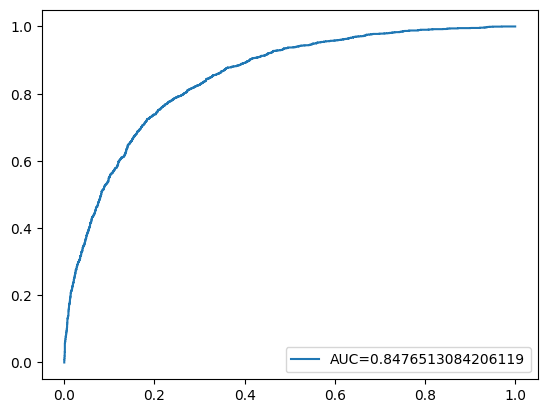

In [24]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
game = 1206

pred = logreg.predict_proba(X_test)[game]
logreg.predict(X_test)[game]
print("Home Win", round(pred[1] * 100, 2), "%")

Home Win 44.7 %


In [28]:
X_test[game]

array([-0.20681238,  0.20681238, -1.81145005, -0.70503479, -1.84991855,
       -0.8106501 , -1.61538487, -0.24500042, -0.17670681, -0.42651464,
        0.26262503, -0.55331842,  0.11741211,  0.19163834,  0.68505512,
        0.91334209,  0.86174054, -0.03633684, -0.30386152,  2.56933814,
       -0.05607212,  0.43564048,  0.17328486,  0.55689546, -0.12684404,
       -0.23795238,  0.03923692, -0.86655264,  0.70838923,  0.0763754 ,
       -1.34106795, -1.16723993, -1.79983604, -1.03593121, -0.2264579 ,
        0.8795489 ,  0.0921553 , -0.2611437 , -0.050304  , -0.57378525,
        0.69878617, -0.15753001,  0.42205592, -0.06444566,  1.28344924,
       -0.17553738, -0.05542067,  0.37854563])